In [1]:
# Sentiment analysis on the basis of twitter

In [2]:
import tweepy
from tweepy import OAuthHandler

import pandas as pd
import matplotlib.pyplot as plt

from googletrans import Translator
translator = Translator()

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [3]:
#Customer credentials
consumer_key = "gOw1mdNDHzbOH2h9gDU3UevLt"
consumer_secret = "XV2yH8o92QAfwE5bGHGtrSOHec4uWfzJTprJwolAPbX9ac1GgS"
access_token = "286104288-aN4C5pHMsgYhy9yZBkCmfAaT281DPpgDWttuZVhv"
access_token_secret = "11Gxmu6JK5LONUNxNYrJU5fQYG6FZh69gWqYmfHImB0On"

In [4]:
#Setup for API access
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [83]:
s="China"

In [84]:
#To Access tweets accross multiple pages use the Cursor method
fetched_tweets = tweepy.Cursor(api.search, q=s).items(1000)

In [85]:
tweets_raw = []
for twt in fetched_tweets:
    tweets_raw.append(twt.text)

In [86]:
import re
def clean_tweet(tweet):
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet)
    return ' '.join(text.lower().strip().split())

In [87]:
tweets_clean = [clean_tweet(txt) for txt in tweets_raw]

In [88]:
tweet_trans=[]
for tweets in tweets_clean:
    k=translator.translate(tweets)
    tweet_trans.append(k.text)

In [89]:
print(tweet_trans)

['norman by copying j20 cheap copy of f22 hq9 chinese c', 'rt wire oecd s gdp forecast y y growth 2020 2021 world 4 5 5 0 china 1 8 8 0 g7 us 3 8', 'rt urgent i need 15 trips of filling sand asap 30 tonnes china truck payment immediately after delivery location lek', 'rt china has been sending spies to the usa on the student visa for years giving them unprecedented access to our country s', 'rt he said he up played the response meaning he took active measures trying to stop it from spreading when there were only a sm', 'rt i just had a tefl interview with a white southafrican woman named karyn she said sa is beyond help hey that s why y', 'rt shocking twitter shuts down account of chinese professor who has evidence china created the coronavirus in a lab', 'po doll china by readystock doll in china the price is more affordable than other dolls because of the doll', 'rt maruti suzuki co has responded to govt s call to reduce dependency from china co asks vendors to look for alternate to'

In [90]:
drop_list = ["rt",'amp', s]
def remove_rt(tweet):
    tokens = tweet.split()
    tokens_clean = [term for term in tokens if term not in drop_list and len(term)>2]
    return " ".join(tokens_clean)
tweets_clean2 = [remove_rt(txt) for txt in tweet_trans]
tweets_combined = " ".join(tweets_clean2)

In [91]:
from nltk.corpus import stopwords
stop_nltk = stopwords.words("english")

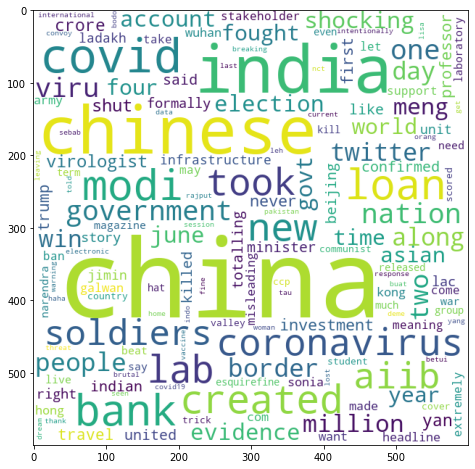

In [92]:
word_cloud=WordCloud(width=600, height=600, stopwords=stop_nltk,
                     background_color='white', max_words=150, normalize_plurals=True,collocations=False).generate_from_text(tweets_combined)
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(word_cloud)
plt.show()

In [93]:

senti = SentimentIntensityAnalyzer()

In [94]:
def get_sentiment_vader(tweet):
    return senti.polarity_scores(tweet)['compound']

In [95]:
senti_score = [get_sentiment_vader(txt) for txt in tweets_clean2]

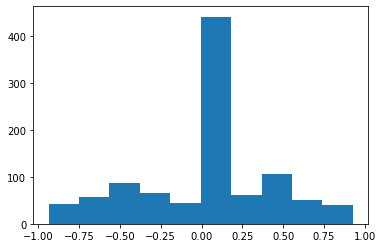

In [96]:
plt.hist(senti_score)
plt.show()

In [97]:
def get_sentiment(tweet):
    polarity=senti.polarity_scores(tweet)
    if(polarity['compound']>=0.05):
        return "Positive"
    elif(polarity['compound']<=-0.05):
        return "Negative"
    else:
        return "Neutral"

In [98]:
df = pd.DataFrame({'tweet':tweets_clean2})
df['sentiment'] = df.tweet.apply(get_sentiment)

In [99]:
df.head(15)

,tweet,sentiment
0,norman copying j20 cheap copy f22 hq9 chinese,Neutral
1,wire oecd gdp forecast growth 2020 2021 world ...,Positive
2,urgent need trips filling sand asap tonnes chi...,Positive
3,china has been sending spies the usa the stude...,Positive
4,said played the response meaning took active m...,Positive
5,just had tefl interview with white southafrica...,Positive
6,shocking twitter shuts down account chinese pr...,Negative
7,doll china readystock doll china the price mor...,Neutral
8,maruti suzuki has responded govt call reduce d...,Neutral
9,june chinese troops kill indian soldiers the g...,Negative


In [100]:
distr = df.sentiment.value_counts(normalize=True)

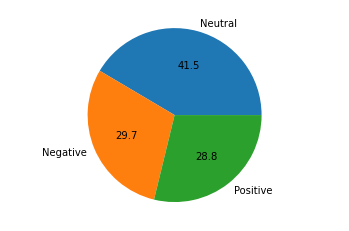

In [101]:
fig, ax = plt.subplots(); ax.axis("equal")
ax.pie(distr.values,labels=list(distr.keys()),autopct='%1.1f')
plt.show()

In [43]:
df.to_csv('liverpool.csv')